# Map statistics of objects in one channel in relation to overlapping objects in another channel
This notebook shows an example of how to use the "Regionprops Map Multichannel" module from napari-skimage-regionprops.

The goal is to measure properties from two channels of a multi-channel image and generate a table that, not only displays these properties, but also shows how properties from objects in a target channel relate to objects in a reference channel.

Thus, in this notebook we:
  - count how many objects from a DNA channel belong or are 'inside' an actin channel
  - get the mean area of objects in the DNA channel which are 'inside' another object in the actin channel
  - get the mean of intensity features of objects in the DNA channel which are 'inside' another object in the actin channel


In [1]:
from skimage import io
import numpy as np
import pandas as pd
import napari
from napari.utils import nbscreenshot
from napari_skimage_regionprops import napari_regionprops_map_channels_table

## Open images in napari

In this small example, we open two cropped images from the [BBBC007 dataset](https://bbbc.broadinstitute.org/BBBC007), and two label images generated from the intensity images.

Thus, we have two intensity images (a multichannel image) and two labels images. The cell labels are shown as contours and the DNA labels are shown as filled regions for better differentiation.

In [2]:
image_channel1 = io.imread('../data/actin.tif')
image_channel2 = io.imread('../data/dna.tif')
cell_labels = io.imread('../data/cell_labels.tif')
dna_labels = io.imread('../data/dna_labels.tif')

In [3]:
viewer = napari.Viewer()

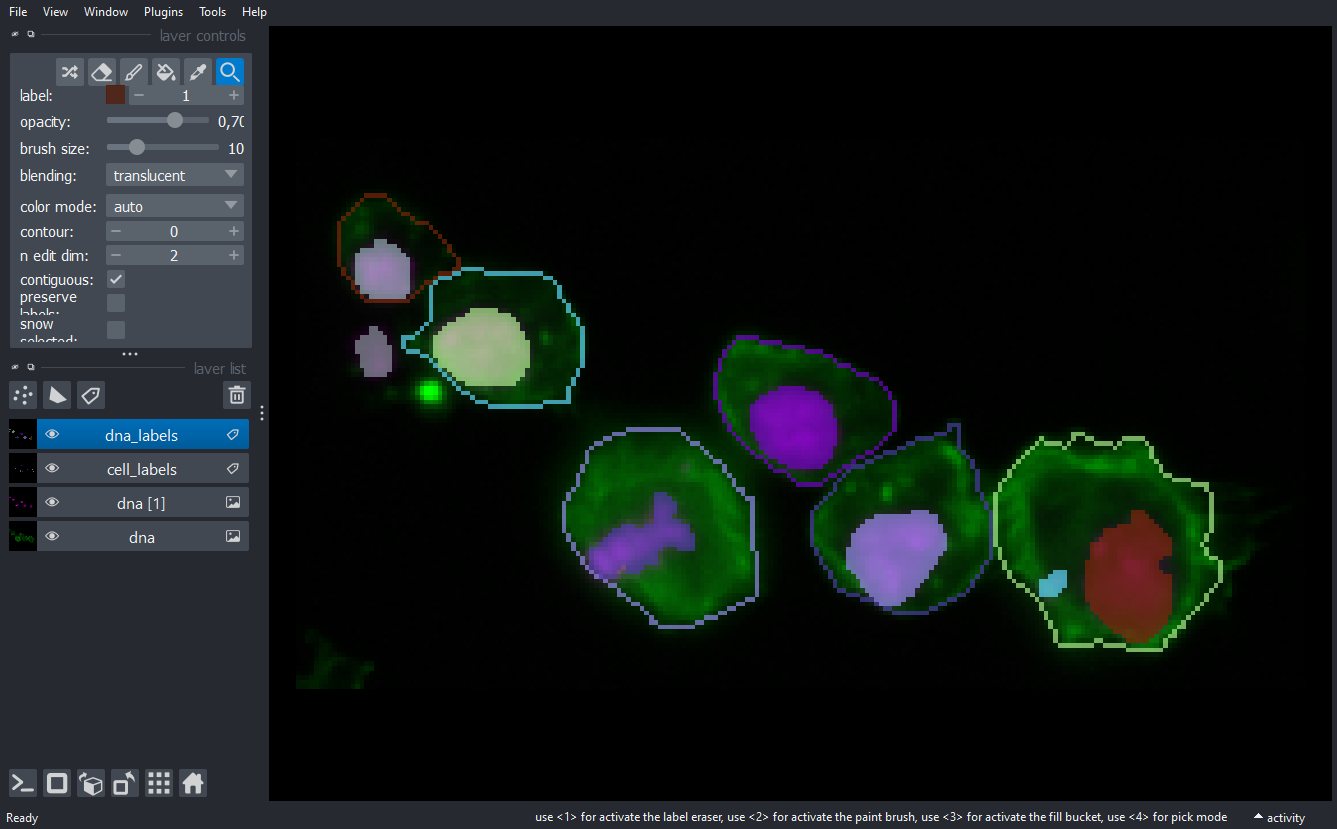

In [4]:
viewer.add_image(image_channel1, name = 'dna', colormap='green')
viewer.add_image(image_channel2, name = 'dna', colormap='magenta', blending='additive')
cell_labels_layer = viewer.add_labels(cell_labels)
cell_labels_layer.contour = 1
dna_labels_layer = viewer.add_labels(dna_labels)
nbscreenshot(viewer)

## Open the plugin
Here we open the plugin by code, but it can also be opened by the Tools menu (Tools -> Measurements -> Regionprops map multichannel).

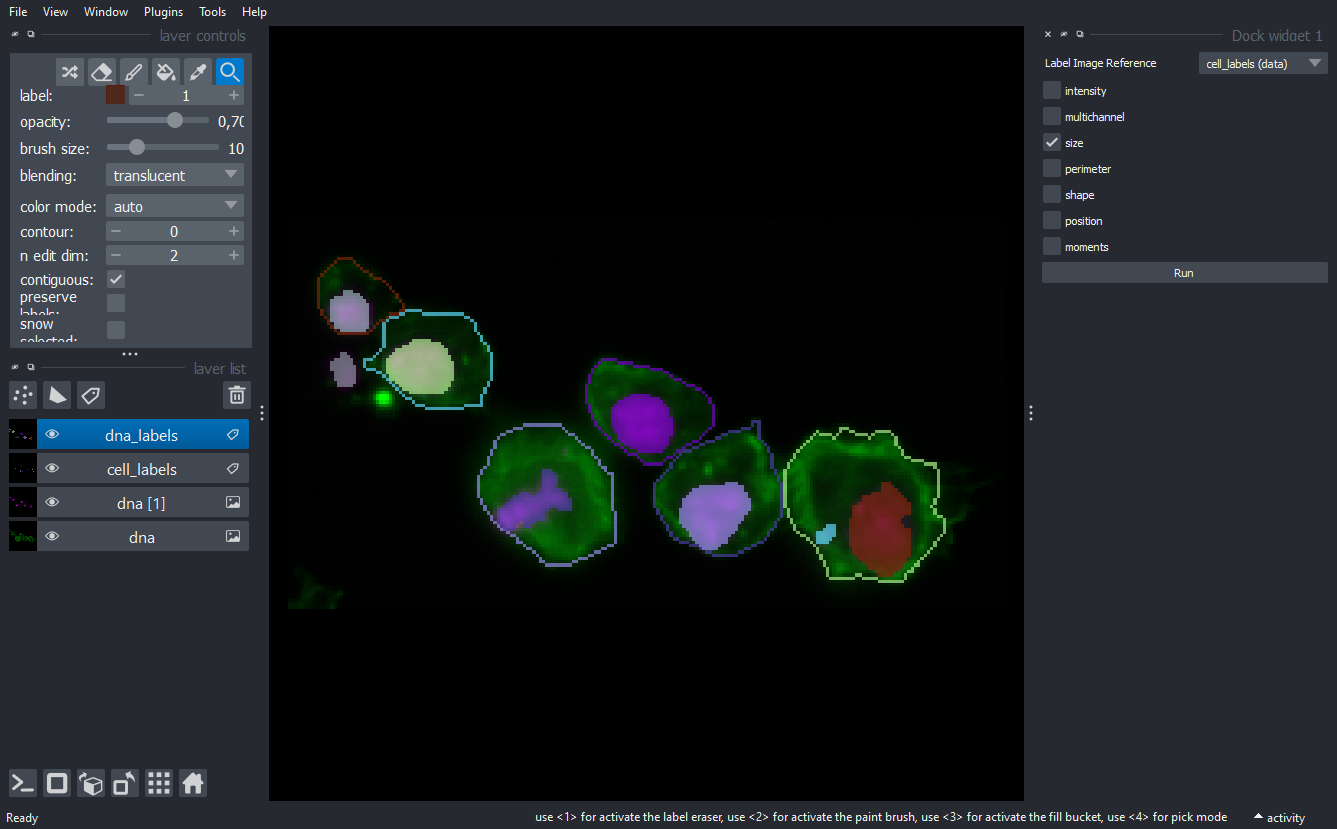

z:\programming\github\napari-skimage-regionprops\napari_skimage_regionprops\_process_tables.py:54: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  output_table = pd.merge(output_table,


['count']


In [5]:
widget = napari_regionprops_map_channels_table()
viewer.window.add_dock_widget(widget)
nbscreenshot(viewer)

## Count number of objects 'inside' objects in another channel

If we just hit the Run button, we get a table containing the size properties of whatever labels layer displayed at the `label image reference` dropdown.

However, if we want to count how many labels from one labels layer can be considered 'inside' another labels layer, we have to also:
  1. check the `multichannel` checkbox;
  2. click on the `+` button in front of `label images to measure`;
  3. assign the second labels layer to `label images to measure`;
  4. hit the Run button.

This returns a small table indicating how many labels (`counts`) from the second labels layer are 'inside' the reference labels layer.

If the label is `0`, it means background.

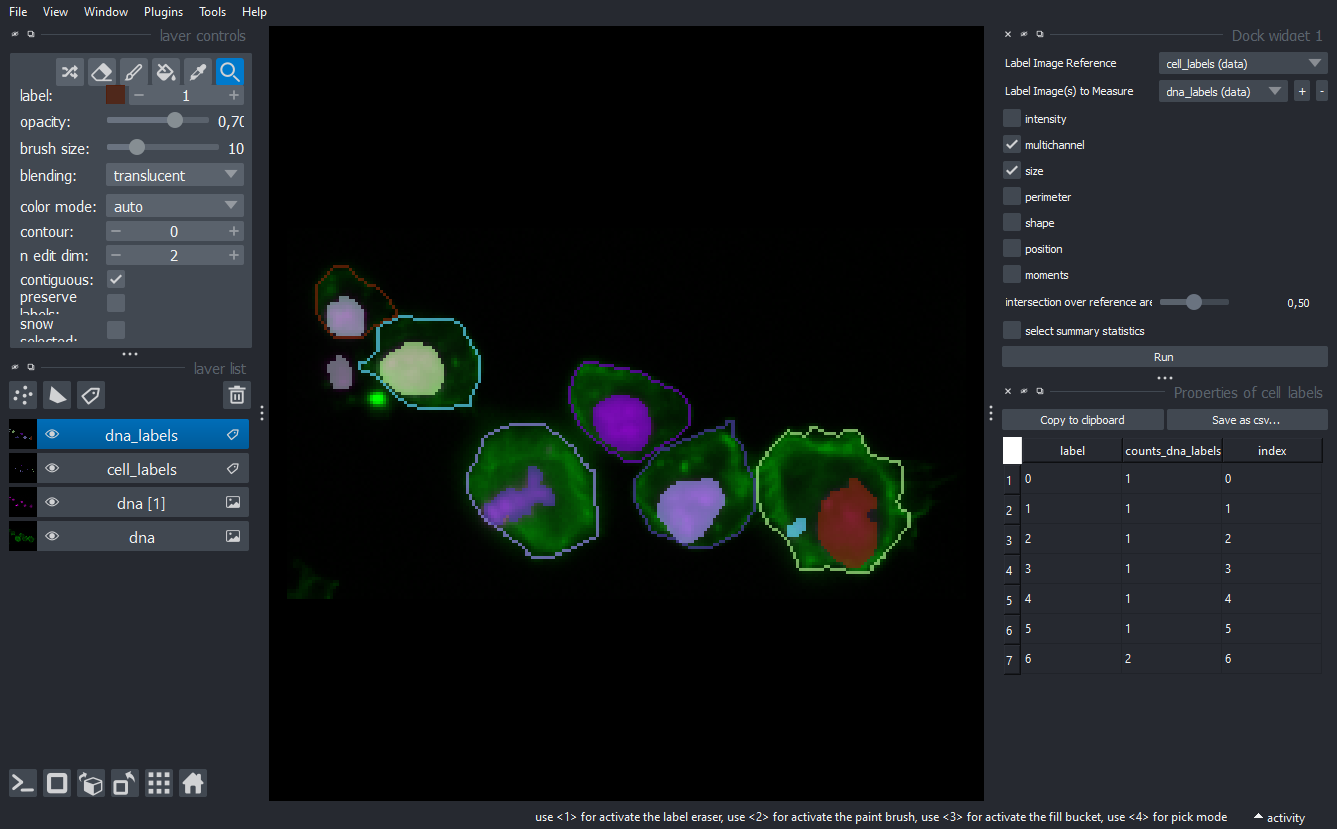

z:\programming\github\napari-skimage-regionprops\napari_skimage_regionprops\_process_tables.py:54: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  output_table = pd.merge(output_table,


['count', 'mean']


In [6]:
nbscreenshot(viewer)

# Get mean area of objects 'inside' objects in another channel

Let's say we want to do more than count objects. We are also interested in knowing the mean area of the objects that are 'inside' objects in another channel. To do that, we should:

  1. click on `select summary statistics` (extra options show up, notice now that `counts` is enabled by default);
  2. check the `mean` checkbox;
  3. hit the Run button.

We now get a larger table, with all the mean values (related to `size`) of the objects 'inside'.

If we check other features, like `perimeter`, `shape`, `position` and `moments`, we will also get mean values for each property involved in these features.

If we check other statistics, like `std`, `minimum`, etc; we will get each of these statistics for every property selected. Therefore, have in mind that the table may become very wide!

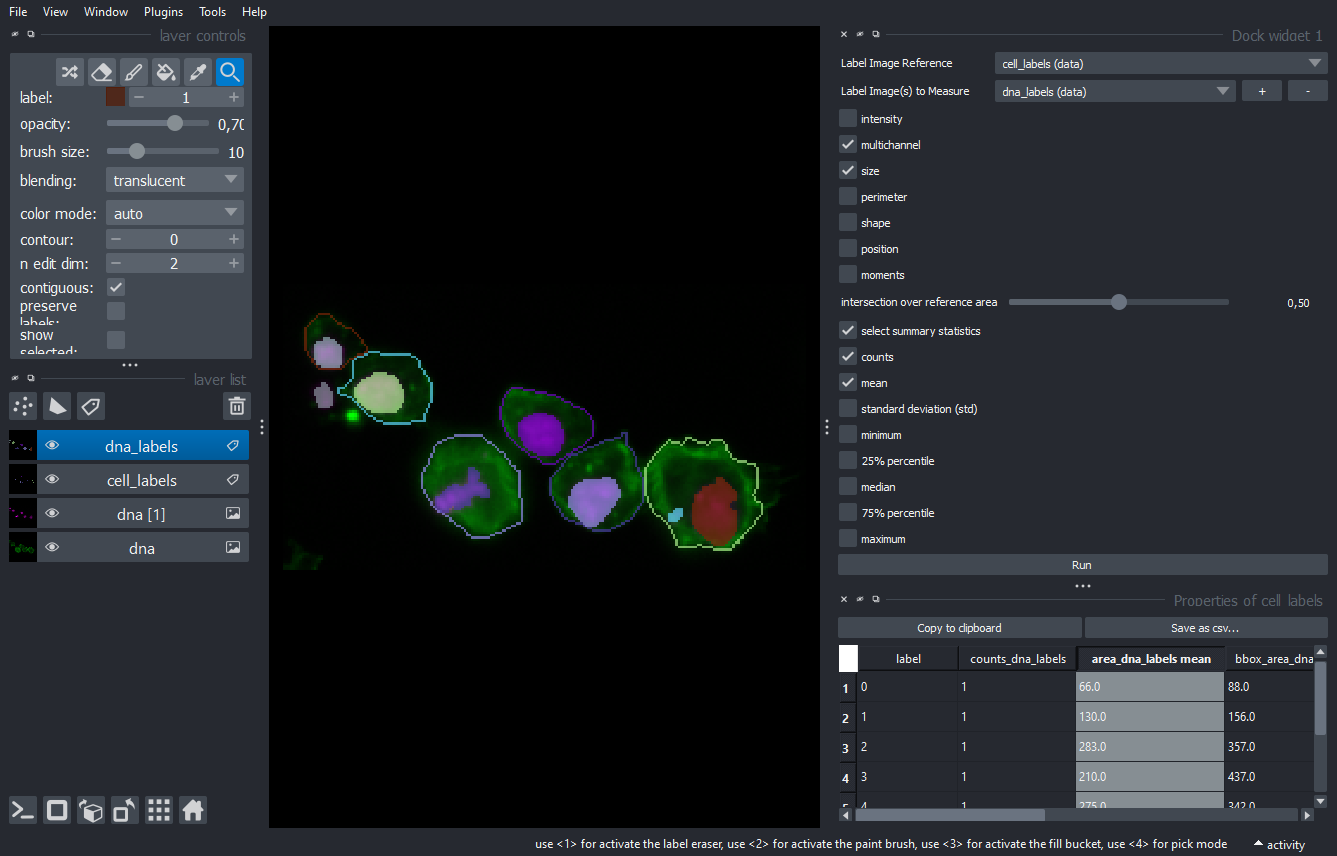

z:\programming\github\napari-skimage-regionprops\napari_skimage_regionprops\_process_tables.py:54: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  output_table = pd.merge(output_table,


['count', 'mean']


In [7]:
nbscreenshot(viewer)

## Include intensity features

We can also measure intensity features if we enable the `intensity` checkbox. Of course, we need intensity images to get these features from. Therefore, one (if `multichannel` if disabled) or two (if `multichannel` is enabled) inputs will be added to the interface. We should select a `intensity image reference` (related to the reference labels) and, if `multichannel`, another `intensity images to measure` (related to the other labels layer).

By clicking on the Run button, we will now also have summary statistics of intensity features added to the table.

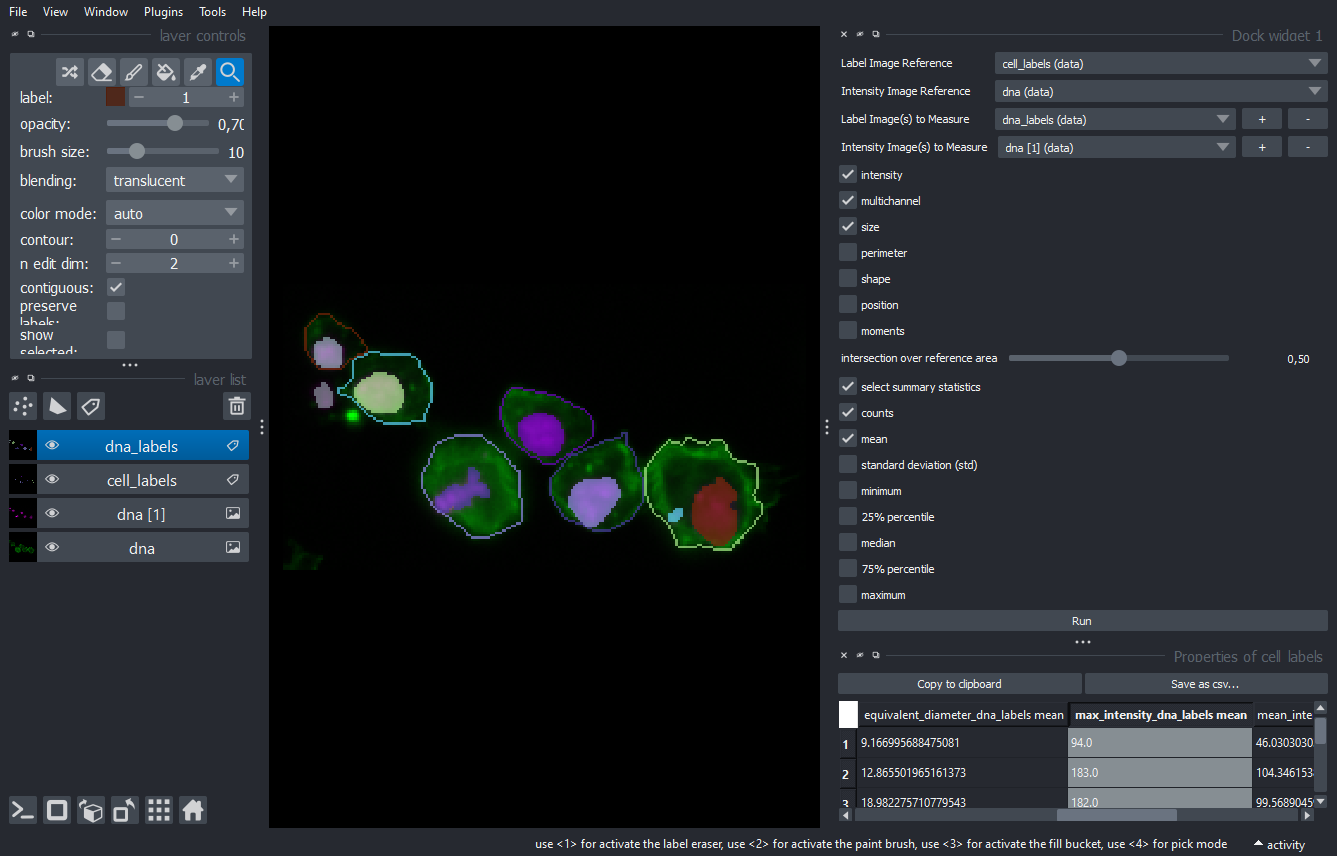

In [8]:
nbscreenshot(viewer)